In [37]:
# @title -##Gathering Data after importing libraries

In [ ]:
#importing Libraries and our DataFrame(by pd)
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [ ]:
#Gathering the Data
df1 = pd.read_csv('twitter-archive-enhanced.csv')
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)

print("Download complete!")
df2 =pd.read_csv('image_predictions.tsv', sep='\t')

Download complete!


In [ ]:
# Initialize a list to store tweet data
tweet_data = []

# Open and read the local file
with open('tweet-json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_id = tweet.get('id')
            retweet_count = tweet.get('retweet_count', 0)
            favorite_count = tweet.get('favorite_count', 0)
            tweet_data.append({
                'tweet_id': tweet_id,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count
            })
        except json.JSONDecodeError:
            print("Skipping a line due to JSON error.")

# Create DataFrame
df3 = pd.DataFrame(tweet_data)
print(df3.head())


             tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048


In [ ]:
df_1 = df1.copy()
df_2 = df2.copy()
df_3 = df3.copy()

In [36]:
# @title -##Assess The Data


In [ ]:
#viewing the information and values of our DataFrame
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [ ]:
#viewing & assess the information and values of our DataFrame
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [ ]:
#viewing & assess the information and values of our DataFrame
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
#viewing & assess the information and values of our DataFrame
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
# @title -##Cleaning The Data


In [ ]:
#-Wrangle Data section
#Sum of the null(Number of the null values in our DataFrame),(access missing values and data)
#-Quality Issue number one(definition:The data contains null(nan) values should be removed)
df_1 =  df_1.isnull().sum().sum()
print(df_1)

20915


In [ ]:
#Merge the DataFrames
merged = pd.merge(df_1, df_2, on='tweet_id', how='inner')
merged_final = pd.merge(merged, df_3, on='tweet_id', how='inner')

#viewing & assess the information and values of our DataFrame
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        1496 non-null   object 
 13  doggo                       80 no

In [ ]:
#-Tidiness Issue number one(definition:Dog stage is spread across four columns instead of being a single variable)
#First replace None in stage columns with empty string as follows.
merged_final.doggo.replace('None', '', inplace=True)
merged_final.pupper.replace('None', '', inplace=True)
merged_final.puppo.replace('None', '', inplace=True)
merged_final.floofer.replace('None', '', inplace=True)

#Tidiness Issue number two(definition:Once multiple stage columns exist, a tidy dataset combines them into a single column)
#Then combine stage columns.
merged_final['stage'] =merged_final.doggo.fillna('') + merged_final.floofer.fillna('') + \
merged_final.pupper.fillna('') + merged_final.puppo.fillna('')

#Then format entries with multiple dog stages which appeared like doggopupper.

merged_final.loc[merged_final.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
merged_final.loc[merged_final.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
merged_final.loc[merged_final.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#DateTime
#-Quality Issue number two(definition:Columns had incorrect data types (e.g., numeric values stored as strings))
merged_final['timestamp'] = pd.to_datetime(merged_final['timestamp'])

#Fix data types according to column meaning
merged_final['tweet_id'] = merged_final['tweet_id'].astype(str)

#Rating columns
merged_final[['rating_numerator', 'rating_denominator']] = merged_final[['rating_numerator', 'rating_denominator']].astype(float)

# Categorical columns
categorical_cols = ['doggo', 'floofer', 'pupper', 'puppo']
merged_final[categorical_cols] = merged_final[categorical_cols].astype('category')

#-Quality Issue number three(definition:Dog stage columns (doggo, floofer, etc.) contain the string "None" instead of actual null values)
dog_cols = ['doggo', 'floofer', 'pupper', 'puppo']
merged_final[dog_cols] = merged_final[dog_cols].replace('None', np.nan)

#Rename confusing columns
#-Quality Issue number four(definition:Columns like p1, p1_conf have unclear or abbreviated names)
merged_final = merged_final.rename(columns={
    'img_num': 'image_number',
    'p1': 'first_prediction',
    'p1_conf': 'first_prediction_confidence',
    'p1_dog': 'first_prediction_is_dog',
    'p2': 'second_prediction',
    'p2_conf': 'second_prediction_confidence',
    'p2_dog': 'second_prediction_is_dog',
    'p3': 'third_prediction',
    'p3_conf': 'third_prediction_confidence',
    'p3_dog': 'third_prediction_is_dog'
})

#-Quality Issue number five(definition:No column existed for the full tweet URL)
merged_final['tweet_url'] = 'https://twitter.com/dog_rates/status/' + merged_final['tweet_id']
#-Quality Issue number six(definition:The source column contains raw HTML (e.g., <a href=...>Twitter for iPhone</a>))
merged_final['source'] = merged_final['source'].apply(lambda x: BeautifulSoup(x, "html.parser").text if pd.notnull(x) else x)
#-Quality Issue number siven(definition:Retweets are not original content and should be excluded)
merged_final = merged_final[merged_final.retweeted_status_id.isnull()]
merged_final = merged_final[merged_final.retweeted_status_user_id.isnull()]
merged_final = merged_final[merged_final.retweeted_status_timestamp.isnull()]

/tmp/ipython-input-17-380866901.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_final.doggo.replace('None', '', inplace=True)
/tmp/ipython-input-17-380866901.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
merged_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,second_prediction,second_prediction_confidence,second_prediction_is_dog,third_prediction,third_prediction_confidence,third_prediction_is_dog,retweet_count,favorite_count,stage,tweet_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,,https://twitter.com/dog_rates/status/891327558...


In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      1994 non-null   object             
 1   in_reply_to_status_id         23 non-null     float64            
 2   in_reply_to_user_id           23 non-null     float64            
 3   timestamp                     1994 non-null   datetime64[ns, UTC]
 4   source                        1994 non-null   object             
 5   text                          1994 non-null   object             
 6   retweeted_status_id           0 non-null      float64            
 7   retweeted_status_user_id      0 non-null      float64            
 8   retweeted_status_timestamp    0 non-null      object             
 9   expanded_urls                 1994 non-null   object             
 10  rating_numerator              1994 non-nu

In [ ]:
#Number of the null values in our DataFrame(access missing values and data)
#-Cleaning Quality Issue number one
merged_final.isnull().sum().sum()

np.int64(18129)

In [ ]:
#cleaning merged here
merged_final.dropna(axis=1 ,inplace=True)

In [ ]:
#check that after cleaning the data is here and not deleted
merged_final.describe()

,rating_numerator,rating_denominator,image_number,first_prediction_confidence,second_prediction_confidence,third_prediction_confidence,retweet_count,favorite_count
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.362857,5.393987e-02,1.619283e-02,624.750000,1982.000000
50%,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [ ]:
#Number of the null values in our DataFrame(access missing values and data)
merged_final.isnull().sum().sum()

np.int64(0)

In [ ]:
merged_final.to_csv("twitter_archive_master.csv", index=False)

from google.colab import files
files.download("twitter_archive_master.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Gathering the Merged_final DataFrame
master = pd.read_csv('twitter_archive_master.csv')

In [ ]:
#Number of the null values in our DataFrame(access missing values and data)
master.isnull().sum().sum()

np.int64(1688)

In [ ]:
#Quality Issue number eight(definition:Some rows in the consolidated stage column have no value)
merged_final.dropna(subset=(['stage']), inplace=True)
master = master[master['stage'].notna()].reset_index(drop=True)

In [ ]:
#Number of the null values in our DataFrame(access missing values and data)
master.isnull().sum().sum()

np.int64(0)

In [ ]:
# @title -##Analyze and visualize(EDA)


In [ ]:
#-EDA section
#Visualization
def do_nothing():
# Create a histogram
  plt.figure(figsize=(10, 5))
  plt.hist(master['tweet_id'], bins=30, color='#2E86C1', edgecolor='black')
  plt.title('Distribution of tweet_ids for Rated Dogs')
  plt.xlabel(' ')
  plt.ylabel('Number of Tweets')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()

# Save the figure
  plt.savefig('hist.png')
  plt.show()

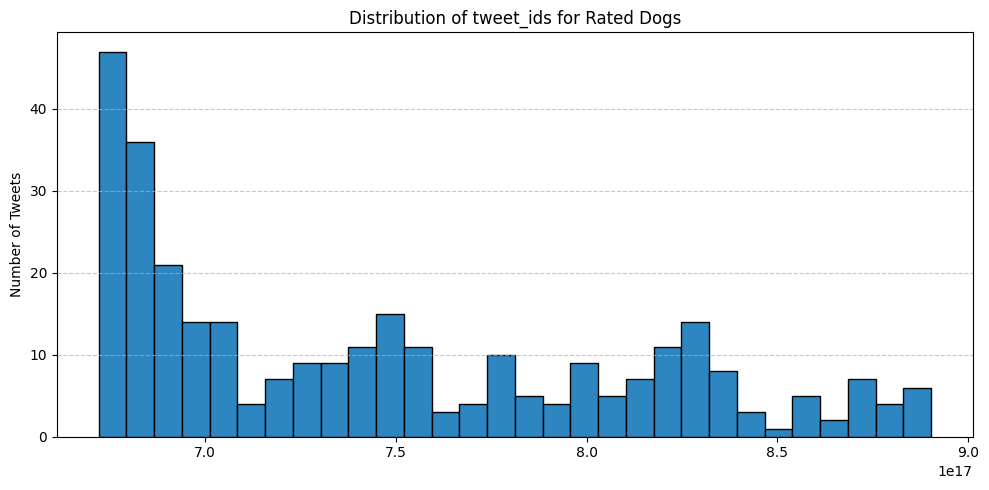

In [ ]:
do_nothing()

In [ ]:
# @title -##Insights & conclusions


In [ ]:
#-insights section
print('After importing Libraries and our DataFrame(by pd), I started viewing the information and values of our DataFrame,')
print('I gathered the data in the tree colabs then cleaned each one alone to make change this tidy,dirty datas into a clean data ,usable, readable for the reader and the reviewer and useful one,')
print('then I started searching for missing and duplicated data(zero) and replacing or get rid of it to get usable data,')
print('I made visualizations for the dataframe to make its viewing easier in one function(do_nothing).')

After importing Libraries and our DataFrame(by pd), I started viewing the information and values of our DataFrame,
I gathered the data in the tree colabs then cleaned each one alone to make change this tidy,dirty datas into a clean data ,usable, readable for the reader and the reviewer and useful one,
then I started searching for missing and duplicated data(zero) and replacing or get rid of it to get usable data,
I made visualizations for the dataframe to make its viewing easier in one function(do_nothing).
